In [1]:
#Второй пунтк сделан не так, нужно посчитать расстояния, а я посчитал другие метрики

# Импорт базовых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Загрузка базы данных

dfm = pd.read_csv('./SpotifyFeatures.csv')

#dfm.head(13)
dfm.shape

(232725, 18)

In [3]:
dfm_P = pd.read_csv('./SpotifyFeatures_new.csv')

In [4]:
X = pd.DataFrame([dfm['tempo']])
X = X.T
Y = pd.DataFrame([dfm_P['Category']])
Y = Y.T
X ['popularity'] = dfm['popularity']
Y = Y.head(2500)
X = X.head(2500)
Y.loc[(Y['Category'] == 'Popular'), 'Category'] = 0
Y.loc[(Y['Category'] == 'Usual'), 'Category'] = 1
Y.fillna(1, inplace=True)
Y.loc[(Y['Category'] == 'Unpopular'), 'Category'] = 2

y = Y['Category']

D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


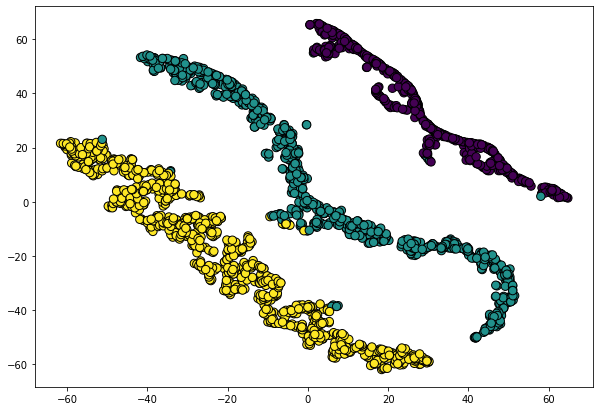

In [5]:
#Алгоритм уменьшения размерности TSNE
from sklearn import datasets
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

X_reduced = tsne.fit_transform(X)
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=y, s=70, edgecolor="k")
plt.show()

In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
import numpy as np

Text(0.98, 0.98, 'Final Clustering')

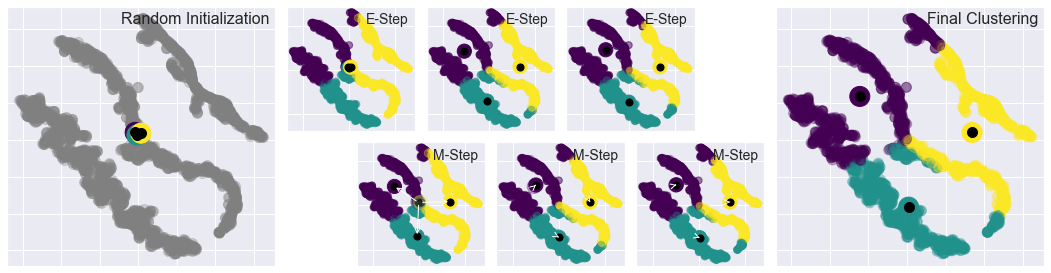

In [7]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

#X, y_true = make_blobs(n_samples=300, centers=3,
                       #cluster_std=0.60, random_state=0)
X, y_true = X_reduced, y
rng = np.random.RandomState(50)
centers = [0, 4] + rng.randn(3, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(3), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(3)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(3):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)

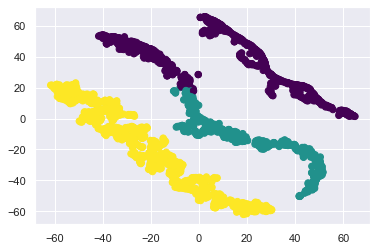

In [16]:
#Gaussian Mixture
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=3,  covariance_type='full', random_state=40).fit(X_reduced)
labels = gmm.predict(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=40, cmap='viridis');


In [17]:
#Вычисление внешней меры оценки качества с помощью индекса Rand

from sklearn.metrics.cluster import rand_score
rand_score(y, y_pred)

0.6410708283313326

In [18]:
#Вычисление внутренней меры оценки качества с помощью Индекса Дэвиcа-Болдуина
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_reduced)
labels = kmeans.labels_
davies_bouldin_score(X_reduced, labels)

0.8237897011657731